# Overview

The principal idea (PI) of this investigation is to use the fact that for a graph $G$ the set of break divisors is a complete set of representatives (CSR) of the chip-firing action. By the PI if we chip-fire some of the divisors of the break divisors the resultant set is a CSR (new_CSR). From the new_CSR we wish to ask if it can be generate by a new_IG function (The data (new_CSR,new_IG) is a stability condition) which we will describe now.

Note the break divisors CSR is given by taking the chip-adding saturation (adding the break divisors) of the IG function 

$$I_{G}:ST(G) \rightarrow Div^{0}(G)$$

assigning to every spanning tree the zero divisor. A set of "good generalised break divisors" $B_{I_G}(G)$ is given by taking the chip-adding saturation of a IG function such that $B_{I_G}(G)$ is a CSR.

We will set that only very particular chip firings from the break divisors CSR result in a new stability condition. Such chip-firings we speculate can be decomposed into what we call "good moves".

One need not start from the break divisor case and ask which stabiltiy conditions can be obtained from good moves. We think this it is possible to transition between and stability conditions via a sequence of good moves.

## Objectives

- Explore the form of good chip firings to get a new stability condition from the break divisor case
- Generate non-trivial examples of stability conditions for large complexity graphs.

## Table of Contents

Order is in reverse with "completed material" at the end, along with functions. Please run functions section before starting.

1. [Chip firing from break to new stabiltiy condition example (I3) then function generalising](#s1)
    1. [I3: Choose a CSR denoted by $S$](#s12)
    2. [I3: Chip-subtract to get $Ass_{G}$](#s13)
    3. [I3: Compute $I_{G}$ from refined $Ass_{G}$](#s14)
    4. [I4: Generalised to a function format and apply to I4.](#s15)
    5. [I4: Searching for good CF to give a new stability condition](#s16)
    
    
2. [Investigating Good moves](#s2)
    1. [Todo:](#s21)
    2. [I4: For each vertex get assignment (before chip firing) of good move classes for break divisors case.](#s22)
    3. [I4: Test new_IG and ask if good move class was correct (gives stability condition).](#s23)
    4. [I4: Generalise procedure to give all new stability conditions per vertex from any stabiltiy condition.](#s24)
    5. [I4: Given any graph get new stability conditions (by good move per vertex) from the break div case.](#s25)
    6. [Examples: Test graph_basecase_new_stab_cons for different large graphs and save data](#s26)
    7. [Non-trivial stability conditions to non-trivial stability conditions by good move.](#s27)
    8. [Commutativity](#s28)
    
    
3. [Functions](#s3)
    1. [Investigating Good moves](#s31)
    2. [General functions](#s32)
    3. [Given a chip firings obtain a new stabiltiy condition for I3 graph](#s33)

# Investigating Good moves <a name="s2"></a>

In this section we apply Natasha's notion of a good move and test on examples if such a move give a stability condition. We also write the code in a form so we can move from one stability condition to another by a good move (not necessarily from the break divisor case). 

In particular we 

- Get for each vertex get good move classes for break divisors case.

- More generally given a stability condition for each vertex get good move classes and produce the new stability conditions (new_Ig,new generalised breaks)

Remark: The main function of this section is good_move_induced_stabconl_per_vert

## Todo: <a name="s21"></a>

- Check good_move_induced_stabconl_per_vert works for non-trivial to new non-trivial stability conditions

- get examples for larger graphs 

- Once done and I have sufficent number of different ones test polytope size, need to unpickle in phi investigation
        and make an area there to check.

- As a consequence we could test for which condition on good move classes allow for commutativity of this process.

Later:
    
- Does there exist good move classes where we can chip-fire by [-1,0,...]?

### Done

1) Reobtained kite graph stabilties to recreate natashas working (where you have different values for the same vertex).
2) For good move class we can take any chip-firing (positive and negative) on "selected assignments".
3) Computed large examples are stored in the correct format in examples folder.

## I4: For each vertex get assignment (before chip firing) of good move classes for break divisors case. <a name="s22"></a>

Remark: The main function we build here is good_move_class_per_vert

Take break divisor stability condition (IG,CSR) 

In [94]:
G=Graph([("0","1"),("1","2"),("2","3"),("3","0")], multiedges=True)

#Take break divisor case

#Init:
n=len(G.vertices())
zero_ass=[0]*n
Ig=[(T.copy(immutable=True),zero_ass) for T in list(G.spanning_trees()) ]

#Break divisors:
B=w_stability(G,Ig) # list
csr=B.tolist() # [[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]]

get dictionary of (key,val) such that key = generalised break divisor b, and value is a list of (t,ass) that chip-add to give b.


In [56]:
b_sat_trees=get_break_ass_dic(G,csr,Ig)
b_sat_trees

{(0, 0, 0, 1): [(Graph on 4 vertices, [0, 0, 0, 0]),
  (Graph on 4 vertices, [0, 0, 0, 0])],
 (0, 0, 1, 0): [(Graph on 4 vertices, [0, 0, 0, 0]),
  (Graph on 4 vertices, [0, 0, 0, 0])],
 (0, 1, 0, 0): [(Graph on 4 vertices, [0, 0, 0, 0]),
  (Graph on 4 vertices, [0, 0, 0, 0])],
 (1, 0, 0, 0): [(Graph on 4 vertices, [0, 0, 0, 0]),
  (Graph on 4 vertices, [0, 0, 0, 0])]}

For each vertex ask what are the good move classes 
(value 0 for break not included but have to be careful wrt general working (discuss with natasha)).

In [36]:
# #Take vertex
# vrt=[1,0,0,0] #for vertex in position 0.

#Take the list of b in csr with value i in position vrt: giving (i,[breaks..])
# gc_top=genbreaks_per_vert(csr,vrt)
# # gc_top # [(0, [[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]]), (1, [[1, 0, 0, 0]])]

For each (i,[breaks..]) of gc_top (obtained by good_move_class_per_vert()).

Ask what are the assignments (T,ass) that chip-add to give atleast one item of (i,[breaks..]).

We will use these "selected assignments" to produce a new_Ig function after chip firing.

Note: Not all of those produce a "good move class" so we will have to check 
(Are these assignments constant on the vertex cf?). 

In [45]:
# Here we iterate through gc_top (remember the different values on the vertes cf)
# to obtain "selected assignments" and then package the data together.

cf=[1,0,0,0]
vrt=[1,0,0,0]
GM=good_move_class_per_vert(G,csr,Ig,vrt,cf,b_sat_trees)
for t in GM:
    print(t,"\n")
    
# #What are the assignments on those with value 1: are they correct?
# a=GM[1][2]
# a[0][0].edges() #[('0', '3', None), ('1', '2', None), ('2', '3', None)]
# a[1][0].edges() #[('0', '1', None), ('1', '2', None), ('2', '3', None)]

# """
# Example:


# ((0, [[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]]), [1, 0, 0, 0], [(Graph on 4 vertices, [0, 0, 0, 0]),
# (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])]) 

# ((1, [[1, 0, 0, 0]]), [1, 0, 0, 0], [(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])])
# """

# cf=[0,1,0,0]
# GM=good_move_class_per_vert(G,csr,Ig,vrt,cf,b_sat_trees)
# for t in GM:
#     print(t,"\n")
    
# #What are the assignments on those with value 1: are they correct?
# a=GM[1][2]
# # a[0][0].edges() #[('0', '3', None), ('1', '2', None), ('2', '3', None)]
# # a[1][0].edges() #[('0', '1', None), ('0', '3', None), ('2', '3', None)]

# cf=[0,0,1,0]
# GM=good_move_class_per_vert(G,csr,Ig,vrt,cf,b_sat_trees)
# for t in GM:
#     print(t,"\n")
    
# #What are the assignments on those with value 1: are they correct?
# a=GM[1][2]
# # a[0][0].edges() #[('0', '1', None), ('0', '3', None), ('2', '3', None)]
# # a[1][0].edges() #[('0', '1', None), ('0', '3', None), ('1', '2', None)]

# cf=[0,0,0,1]
# GM=good_move_class_per_vert(G,csr,Ig,vrt,cf,b_sat_trees)
# for t in GM:
#     print(t,"\n")
    
# #What are the assignments on those with value 1: are they correct?
# a=GM[1][2]
# # a[0][0].edges() #[('0', '1', None), ('1', '2', None), ('2', '3', None)]
# # a[1][0].edges() #[('0', '1', None), ('0', '3', None), ('1', '2', None)]

((0, [[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]]), [1, 0, 0, 0], [(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])]) 

((1, [[1, 0, 0, 0]]), [1, 0, 0, 0], [(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])]) 



In [ ]:
## I4: Chip fire assignments of good move classes and build new_IG from break case.

Example: take good move class I know works and generate the new stability condition from the new_Ig function

In [95]:
vrt=[1,0,0,0]
cf=[1,0,0,0]
GM=good_move_class_per_vert(G,csr,Ig,vrt,cf,b_sat_trees)
GM[1]

((1, [[1, 0, 0, 0]]),
 [(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])])

Given a "good move class" take the "selected assignments" and chip-fire these on CF to obtain the assignments we want to use in the new Ig.

In [48]:
#Take the assignemnts of the "good move class" (still dont know if its a true good move class yet,
# might not give stabiltiy condition)
selected_ass=GM[1][2]
selected_ass #[(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])]

[(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])]

In [49]:
#chip fire

#Take the (T,ass) in selected_ass and convert to (T,chip firied ass by cf).
cf_selected_ass=[]
for ass in selected_ass:
    T,div=ass
    cf_div=chip_fire(T.copy(immutable=False),div,cf)
    cf_selected_ass.append((T.copy(immutable=True),cf_div))
    
# cf_selected_ass

#Can check that chip firing on trees works
#show(cf_selected_ass[0][0])

In [50]:
cf_selected_ass #[(Graph on 4 vertices, [-1, 0, 0, 1]), (Graph on 4 vertices, [-1, 1, 0, 0])]

[(Graph on 4 vertices, [-1, 0, 0, 1]), (Graph on 4 vertices, [-1, 1, 0, 0])]

Build new I_G function by joining cf_selected_ass with the complement on selected_ass in base_assignments (starting Ig).

In [51]:
# selected_ass

# base_assignments

complement_ass = [ass for ass in Ig if ass not in selected_ass]
new_Ig=cf_selected_ass+complement_ass

# for b in selected_ass:
#     print(b[0].edges(),b[1])
# print("---")

# for b in complement_ass:
#     print(b[0].edges(),b[1])

# print("---")

# for b in base_assignments:
#     print(b[0].edges(),b[1])
# print("---")

# for b in new_Ig:
#     print(b[0].edges(),b[1])

## I4: Test new_IG and ask if good move class was correct (gives stability condition).<a name="s23"></a>

Test new I_G by taking chip-adding saturation (adding all the break divisors) of new_Ig to get possible_new_gb 

If possible_new_gb has size complexity of the graph then new_gb=possible_new_gb.

This will give us a new stability condition (new_Ig,new_gb).

In [52]:
possible_new_gb=w_stability(G,new_Ig)

In [69]:
complexity=len(Ig)
if possible_new_gb.shape[0]==complexity:
    new_gb=possible_new_gb
    print(new_Ig,new_gb)



# #If rerun but with selected_ass=GM[1][2], when val was 0 get:BAD
# """
# array([[-2,  1,  0,  2],
#        [-2,  1,  1,  1],
#        [-2,  2,  0,  1],
#        [-1,  1,  0,  1],
#        [ 0,  0,  0,  1],
#        [ 0,  1,  0,  0]], dtype=int32)
# """

[(Graph on 4 vertices, [-1, 0, 0, 1]), (Graph on 4 vertices, [-1, 1, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])] [[-1  1  0  1]
 [ 0  0  0  1]
 [ 0  0  1  0]
 [ 0  1  0  0]]


## I4: Generalise procedure to give all new stability conditions per vertex from any stabiltiy condition. <a name="s24"></a>

Turn the above procedure into a function to go from cf(possible different values on this vert),Ig,csr to a list of new stability conditions.

In [98]:
vrt=[1,0,0,0]
cf=[1,0,0,0]
new_stabs_v0=good_move_induced_stabconl_per_vert(G,Ig,vrt,cf) 
new_stabs_v0

[([(Graph on 4 vertices, [-1, 0, 0, 1]),
   (Graph on 4 vertices, [-1, 1, 0, 0]),
   (Graph on 4 vertices, [0, 0, 0, 0]),
   (Graph on 4 vertices, [0, 0, 0, 0])],
  array([[-1,  1,  0,  1],
         [ 0,  0,  0,  1],
         [ 0,  0,  1,  0],
         [ 0,  1,  0,  0]], dtype=int32))]

## I4: Given any graph get new stability conditions (by good move per vertex) from the break div case. <a name="s25"></a>

Given a graph, get the break divisor case (Ig,breaks) and then from that with the cf produce the new wsc.

In [100]:
vrt=[1,0,0,0]
cf=[1,0,0,0]

stab_con_l=graph_basecase_new_stab_cons(G,vrt,cf)
stab_con_l

[([(Graph on 4 vertices, [-1, 0, 0, 1]),
   (Graph on 4 vertices, [-1, 1, 0, 0]),
   (Graph on 4 vertices, [0, 0, 0, 0]),
   (Graph on 4 vertices, [0, 0, 0, 0])],
  array([[-1,  1,  0,  1],
         [ 0,  0,  0,  1],
         [ 0,  0,  1,  0],
         [ 0,  1,  0,  0]], dtype=int32))]

## I4: Check good_move_induced_stabconl_per_vert works for non-trivial to new non-trivial stability conditions

In [ ]:
Doing the 1+3 example in the notes.

In [105]:
#Inital new stabiltiy condition
vrt=[1,0,0,0]
cf=[1,0,0,0]

stab_con_l=graph_basecase_new_stab_cons(G,vrt,cf)
stab_con_l

[([(Graph on 4 vertices, [-1, 0, 0, 1]),
   (Graph on 4 vertices, [-1, 1, 0, 0]),
   (Graph on 4 vertices, [0, 0, 0, 0]),
   (Graph on 4 vertices, [0, 0, 0, 0])],
  array([[-1,  1,  0,  1],
         [ 0,  0,  0,  1],
         [ 0,  0,  1,  0],
         [ 0,  1,  0,  0]], dtype=int32))]

In [106]:
vrt=[0,0,1,0]
cf=[0,0,1,0]

nstab_con_l=reapply(G,stab_con_l,vrt,cf,pos=0)
nstab_con_l

[([(Graph on 4 vertices, [0, 0, -1, 1]),
   (Graph on 4 vertices, [0, 1, -1, 0]),
   (Graph on 4 vertices, [-1, 0, 0, 1]),
   (Graph on 4 vertices, [-1, 1, 0, 0])],
  array([[-1,  1,  0,  1],
         [ 0,  0,  0,  1],
         [ 0,  1, -1,  1],
         [ 0,  1,  0,  0]], dtype=int32))]

Can we go the other way, doing 3 then 1? (Yes I guess so as they are disjoint wrt the trees in the Ig.)


In [107]:
#Inital new stabiltiy condition
vrt=[0,0,1,0]
cf=[0,0,1,0]

stab_con_l=graph_basecase_new_stab_cons(G,vrt,cf)
stab_con_l

[([(Graph on 4 vertices, [0, 0, -1, 1]),
   (Graph on 4 vertices, [0, 1, -1, 0]),
   (Graph on 4 vertices, [0, 0, 0, 0]),
   (Graph on 4 vertices, [0, 0, 0, 0])],
  array([[ 0,  0,  0,  1],
         [ 0,  1, -1,  1],
         [ 0,  1,  0,  0],
         [ 1,  0,  0,  0]], dtype=int32))]

In [108]:
vrt=[1,0,0,0]
cf=[1,0,0,0]

nstab_con_l=reapply(G,stab_con_l,vrt,cf,pos=0)
nstab_con_l

[([(Graph on 4 vertices, [-1, 0, 0, 1]),
   (Graph on 4 vertices, [-1, 1, 0, 0]),
   (Graph on 4 vertices, [0, 0, -1, 1]),
   (Graph on 4 vertices, [0, 1, -1, 0])],
  array([[-1,  1,  0,  1],
         [ 0,  0,  0,  1],
         [ 0,  1, -1,  1],
         [ 0,  1,  0,  0]], dtype=int32))]

## Examples: Test graph_basecase_new_stab_cons for different large graphs and save data <a name="s26"></a>

Lets take some different graphs and test graph_basecase_new_stab_cons

### Triangle

In [90]:
graphname="I3"
G=Graph([("0","1"),("1","2"),("2","0")], multiedges=True)

vrt=[1,0,0]
cf=[1,0,0] #works
# cf=[-1,0,0] #does not work


stab_l=graph_basecase_new_stab_cons(G,vrt,cf)
con_stab_l=convert_format(stab_l)


The value (1, [[1, 0, 0]]) outputs to stability condition


In [91]:
save_data(graphname,con_stab_l)

In [92]:
x=load_data(graphname)

In [93]:
x

[([[-1, 0, 1], [-1, 1, 0], [0, 0, 0]],
  array([[-1,  1,  1],
         [ 0,  0,  1],
         [ 0,  1,  0]], dtype=int32),
  [(Graph on 3 vertices, [-1, 0, 1]),
   (Graph on 3 vertices, [-1, 1, 0]),
   (Graph on 3 vertices, [0, 0, 0])],
  None)]

### Kite=G4M2

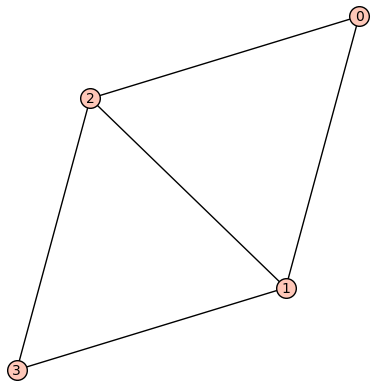

In [185]:
G=Graph([("0","1"),("1","2"),("2","3"),("0","2"),("1","3")], multiedges=True)
# n=len(G.vertices())
# G.relabel({int(i):str(i) for i in range(n)})
G.show()

Should get two cases for vertex "1" have those with value 1 or 2.

QUESTION:Using the theory can you tell me why is 

gm ((1, [[0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 0]]), [(Graph on 4 vertices, [0, 0, 0, 0]),
                                                      (Graph on 4 vertices, [0, 0, 0, 0]),
                                                      (Graph on 4 vertices, [0, 0, 0, 0]),
                                                      (Graph on 4 vertices, [0, 0, 0, 0]),
                                                      (Graph on 4 vertices, [0, 0, 0, 0]), 
                                                      (Graph on 4 vertices, [0, 0, 0, 0]), 
                                                      (Graph on 4 vertices, [0, 0, 0, 0])]) 
not good? 

In [68]:
# vrt=[0,1,0,0]
# cf=[0,1,0,0]

# new_stabs_v_lst=graph_basecase_new_stab_cons(G,vrt,cf)
# new_stabs_v_lst

# gm ((0, [[0, 0, 1, 1], [0, 0, 2, 0], [1, 0, 0, 1], [1, 0, 1, 0]]), [(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])]) 

# gm ((1, [[0, 1, 0, 1], [0, 1, 1, 0], [1, 1, 0, 0]]), [(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])]) 

# gm ((2, [[0, 2, 0, 0]]), [(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])]) 

# The value (2, [[0, 2, 0, 0]]) outputs to stability condition
# [([(Graph on 4 vertices, [0, -1, 0, 1]),
#    (Graph on 4 vertices, [0, -1, 1, 0]),
#    (Graph on 4 vertices, [1, -1, 0, 0]),
#    (Graph on 4 vertices, [0, 0, 0, 0]),
#    (Graph on 4 vertices, [0, 0, 0, 0]),
#    (Graph on 4 vertices, [0, 0, 0, 0]),
#    (Graph on 4 vertices, [0, 0, 0, 0]),
#    (Graph on 4 vertices, [0, 0, 0, 0])],
#   array([[ 0,  0,  1,  1],
#          [ 0,  0,  2,  0],
#          [ 0,  1,  0,  1],
#          [ 0,  1,  1,  0],
#          [ 1, -1,  1,  1],
#          [ 1,  0,  0,  1],
#          [ 1,  0,  1,  0],
#          [ 1,  1,  0,  0]], dtype=int32))]

In [186]:
#Inital new stabiltiy condition

vrt,cf=vrt_cf(G,0,0)

stab_con_l=graph_basecase_new_stab_cons(G,vrt,cf)
stab_con_l

The value (1, [[1, 0, 0, 1], [1, 0, 1, 0], [1, 1, 0, 0]]) outputs to stability condition 



[([(Graph on 4 vertices, [-1, 0, 1, 0]),
   (Graph on 4 vertices, [-1, 0, 1, 0]),
   (Graph on 4 vertices, [-1, 1, 0, 0]),
   (Graph on 4 vertices, [-1, 1, 0, 0]),
   (Graph on 4 vertices, [-1, 0, 1, 0]),
   (Graph on 4 vertices, [-1, 1, 0, 0]),
   (Graph on 4 vertices, [0, 0, 0, 0]),
   (Graph on 4 vertices, [0, 0, 0, 0])],
  array([[-1,  1,  1,  1],
         [-1,  1,  2,  0],
         [-1,  2,  1,  0],
         [ 0,  0,  1,  1],
         [ 0,  0,  2,  0],
         [ 0,  1,  0,  1],
         [ 0,  1,  1,  0],
         [ 0,  2,  0,  0]], dtype=int32))]

In [187]:
#from new stabiltiy condition from break case  to new_
vrt,cf=vrt_cf(G,3,3)

nstab_con_l=reapply(G,stab_con_l,vrt,cf,pos=0)
nstab_con_l

The value (1, [[-1, 1, 1, 1], [0, 0, 1, 1], [0, 1, 0, 1]]) outputs to stability condition 



[([(Graph on 4 vertices, [-1, 0, 2, -1]),
   (Graph on 4 vertices, [-1, 1, 1, -1]),
   (Graph on 4 vertices, [-1, 1, 1, -1]),
   (Graph on 4 vertices, [-1, 2, 0, -1]),
   (Graph on 4 vertices, [0, 0, 1, -1]),
   (Graph on 4 vertices, [0, 1, 0, -1]),
   (Graph on 4 vertices, [-1, 0, 1, 0]),
   (Graph on 4 vertices, [-1, 1, 0, 0])],
  array([[-1,  1,  2,  0],
         [-1,  2,  1,  0],
         [-1,  2,  2, -1],
         [ 0,  0,  2,  0],
         [ 0,  1,  1,  0],
         [ 0,  1,  2, -1],
         [ 0,  2,  0,  0],
         [ 0,  2,  1, -1]], dtype=int32))]

### Complete on 5

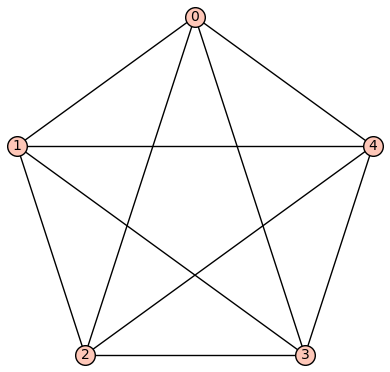

The value (3, [[3, 0, 0, 1, 2], [3, 0, 0, 2, 1], [3, 0, 1, 0, 2], [3, 0, 1, 1, 1], [3, 0, 1, 2, 0], [3, 0, 2, 0, 1], [3, 0, 2, 1, 0], [3, 1, 0, 0, 2], [3, 1, 0, 1, 1], [3, 1, 0, 2, 0], [3, 1, 1, 0, 1], [3, 1, 1, 1, 0], [3, 1, 2, 0, 0], [3, 2, 0, 0, 1], [3, 2, 0, 1, 0], [3, 2, 1, 0, 0]]) outputs to stability condition 



[([(Graph on 5 vertices, [-1, 0, 0, 0, 1]),
   (Graph on 5 vertices, [-1, 0, 0, 0, 1]),
   (Graph on 5 vertices, [-1, 0, 0, 0, 1]),
   (Graph on 5 vertices, [-1, 0, 0, 0, 1]),
   (Graph on 5 vertices, [-1, 0, 0, 0, 1]),
   (Graph on 5 vertices, [-1, 0, 0, 0, 1]),
   (Graph on 5 vertices, [-1, 0, 0, 1, 0]),
   (Graph on 5 vertices, [-1, 0, 0, 1, 0]),
   (Graph on 5 vertices, [-1, 0, 0, 1, 0]),
   (Graph on 5 vertices, [-1, 0, 0, 1, 0]),
   (Graph on 5 vertices, [-1, 0, 0, 1, 0]),
   (Graph on 5 vertices, [-1, 0, 0, 1, 0]),
   (Graph on 5 vertices, [-1, 0, 1, 0, 0]),
   (Graph on 5 vertices, [-1, 0, 1, 0, 0]),
   (Graph on 5 vertices, [-1, 0, 1, 0, 0]),
   (Graph on 5 vertices, [-1, 0, 1, 0, 0]),
   (Graph on 5 vertices, [-1, 0, 1, 0, 0]),
   (Graph on 5 vertices, [-1, 0, 1, 0, 0]),
   (Graph on 5 vertices, [-1, 1, 0, 0, 0]),
   (Graph on 5 vertices, [-1, 1, 0, 0, 0]),
   (Graph on 5 vertices, [-1, 1, 0, 0, 0]),
   (Graph on 5 vertices, [-1, 1, 0, 0, 0]),
   (Graph on 5 vertices, [-1, 1,

In [222]:
G = graphs.CompleteGraph(5)
n=len(G.vertices())
G.relabel({int(i):str(i) for i in range(n)})
G.show()

#Inital new stabiltiy condition

vrt,cf=vrt_cf(G,0,0)

stab_con_l=graph_basecase_new_stab_cons(G,vrt,cf)
stab_con_l

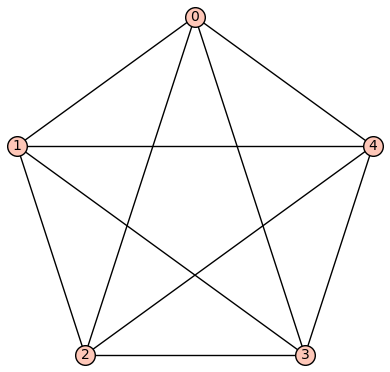

In [19]:
#from new stabiltiy condition from break case  to new_
vrt,cf=vrt_cf(G,3,3)

nstab_con_l=reapply(G,stab_con_l,vrt,cf,pos=0)
nstab_con_l

### Buliding complicated graphs

In [6]:
# I=Graph({0:[1,2,3], 4:[0,2], 6:[1,2,3,4,5]})
# H = graphs.CycleGraph(5)

# G= I.union(H)
# plot(G)

## Other graphs

https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/generators/smallgraphs.html#sage.graphs.generators.smallgraphs.WagnerGraph

### Test example 

In [56]:
# g=Graph([("0","1"),("1","2"),("2","3"),("0","2"),("1","3")], multiedges=True)

# # #Inital new stabiltiy condition
# # vrt,cf=vrt_cf(G,0,0)
# # stab_con_l=graph_basecase_new_stab_cons(G,vrt,cf)
# # stab_con_l

# test_g(g,flag=True)

### Wheel graph family

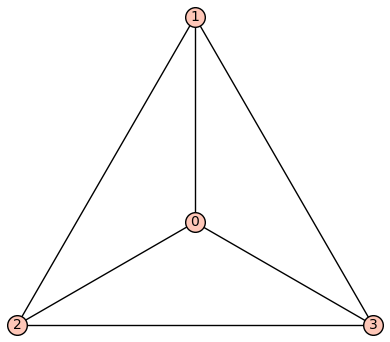

In [12]:
graphname="Wheel_4"
g=graphs.WheelGraph(4) #g = graphs.TetrahedralGraph()
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()

In [58]:
# g.edges(labels=False)
# graphname="Wheel_4"
# # g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('1', '2'), ('1', '3'), ('2', '3')], multiedges=True)

In [13]:
con_stab_l=run_all_verts(g)

Elapsed time: mult_initializer : 0.15850138664245605 seconds
Number of vertices 4
The value (2, [[2, 0, 0, 1], [2, 0, 1, 0], [2, 1, 0, 0]]) outputs to stability condition 

Elapsed time: 0.15108847618103027 seconds
Number of vertices 4
The value (2, [[0, 2, 0, 1], [0, 2, 1, 0], [1, 2, 0, 0]]) outputs to stability condition 

Elapsed time: 0.07062482833862305 seconds
Number of vertices 4
The value (2, [[0, 0, 2, 1], [0, 1, 2, 0], [1, 0, 2, 0]]) outputs to stability condition 

Elapsed time: 0.08141446113586426 seconds
Number of vertices 4
The value (2, [[0, 0, 1, 2], [0, 1, 0, 2], [1, 0, 0, 2]]) outputs to stability condition 

Elapsed time: 0.07018232345581055 seconds


In [76]:
# save_data(graphname,con_stab_l)

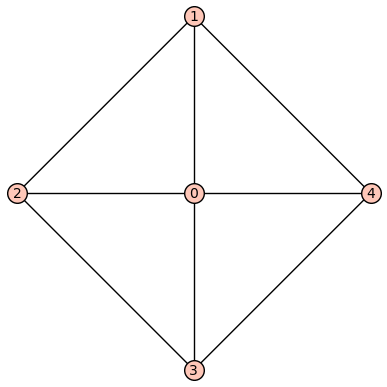

In [60]:
graphname="Wheel_5"
g=graphs.WheelGraph(5)
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()

In [61]:
# graphname="Wheel_5"
# # g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('1', '2'), ('1', '4'), ('2', '3'), ('3', '4')], multiedges=True)
# g.edges(labels=False)

[('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('1', '2'), ('1', '4'), ('2', '3'), ('3', '4')]

In [35]:
# con_stab_l=run_all_verts(g)

In [73]:
# save_data(graphname,con_stab_l)

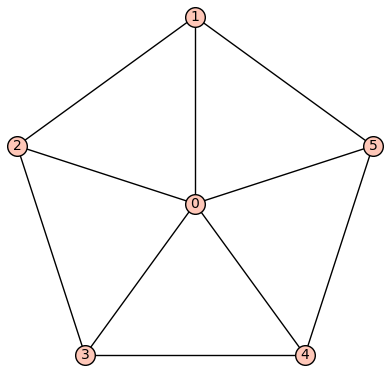

In [62]:
graphname="Wheel_6"
g=graphs.WheelGraph(6)
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()

In [64]:
# graphname="Wheel_6"
# # g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '5'), ('2', '3'), ('3', '4'), ('4', '5')], multiedges=True)
# g.edges(labels=False)

[('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '5'), ('2', '3'), ('3', '4'), ('4', '5')]

In [36]:
# con_stab_l=run_all_verts(g)

In [79]:
# save_data(graphname,con_stab_l)

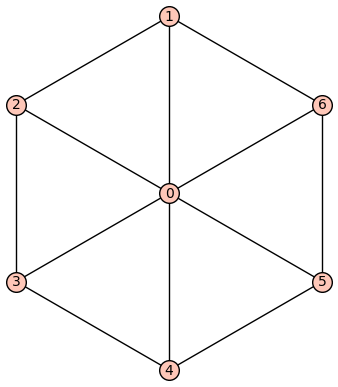

In [27]:
graphname="Wheel_7"
g=graphs.WheelGraph(7)
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()

In [65]:
# graphname="Wheel_7"
# g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '5'), ('2', '3'), ('3', '4'), ('4', '5')], multiedges=True)

# g.edges(labels=False)

[('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '5'), ('2', '3'), ('3', '4'), ('4', '5')]

In [37]:
# con_stab_l=run_all_verts(g)

In [ ]:
# save_data(graphname,con_stab_l)

### CompleteBipartiteGraph family

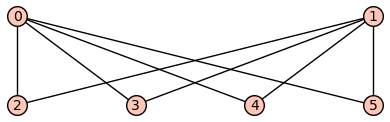

In [66]:
graphname="K24"
g=graphs.CompleteBipartiteGraph(2,4)
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()

In [67]:
# graphname="K24"
# # g=Graph([('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5')], multiedges=True)

# g.edges(labels=False)

[('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5')]

In [41]:
# con_stab_l=run_all_verts(g)

In [42]:
# save_data(graphname,con_stab_l)

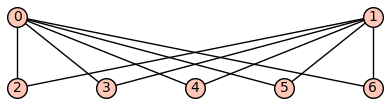

In [68]:
graphname="K25"
g=graphs.CompleteBipartiteGraph(2,5)
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()

In [69]:
# graphname="K25"
# g=Graph([('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6')], multiedges=True)
# g.edges(labels=False)

[('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6')]

In [46]:
# con_stab_l=run_all_verts(g)

In [47]:
# save_data(graphname,con_stab_l)

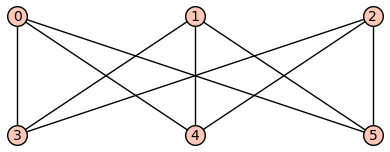

In [70]:
graphname="K33"
g=graphs.CompleteBipartiteGraph(3,3)
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()

In [14]:
# graphname="K33"
# g=Graph([('0', '3'), ('0', '4'), ('0', '5'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '5')], multiedges=True)
# g.edges(labels=False)

In [49]:
# con_stab_l=run_all_verts(g)
#Elapsed time: mult_initializer : 2.890507221221924 seconds

Elapsed time: mult_initializer : 2.890507221221924 seconds
Number of vertices 6
The value (2, [[2, 0, 0, 0, 1, 1], [2, 0, 0, 1, 0, 1], [2, 0, 0, 1, 1, 0], [2, 0, 1, 0, 0, 1], [2, 0, 1, 0, 1, 0], [2, 0, 1, 1, 0, 0], [2, 0, 2, 0, 0, 0], [2, 1, 0, 0, 0, 1], [2, 1, 0, 0, 1, 0], [2, 1, 0, 1, 0, 0], [2, 1, 1, 0, 0, 0], [2, 2, 0, 0, 0, 0]]) outputs to stability condition 

Elapsed time: 0.33254098892211914 seconds
Number of vertices 6
The value (2, [[0, 2, 0, 0, 1, 1], [0, 2, 0, 1, 0, 1], [0, 2, 0, 1, 1, 0], [0, 2, 1, 0, 0, 1], [0, 2, 1, 0, 1, 0], [0, 2, 1, 1, 0, 0], [0, 2, 2, 0, 0, 0], [1, 2, 0, 0, 0, 1], [1, 2, 0, 0, 1, 0], [1, 2, 0, 1, 0, 0], [1, 2, 1, 0, 0, 0], [2, 2, 0, 0, 0, 0]]) outputs to stability condition 

Elapsed time: 0.33324575424194336 seconds
Number of vertices 6
The value (2, [[0, 0, 2, 0, 1, 1], [0, 0, 2, 1, 0, 1], [0, 0, 2, 1, 1, 0], [0, 1, 2, 0, 0, 1], [0, 1, 2, 0, 1, 0], [0, 1, 2, 1, 0, 0], [0, 2, 2, 0, 0, 0], [1, 0, 2, 0, 0, 1], [1, 0, 2, 0, 1, 0], [1, 0, 2, 1, 0, 0], [

In [50]:
save_data(graphname,con_stab_l)

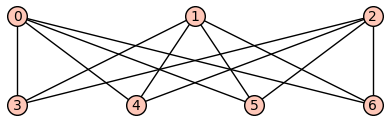

In [73]:
graphname="K34"
g=graphs.CompleteBipartiteGraph(3,4)
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()

In [74]:
# graphname="K34"
# g=Graph([('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('2', '3'), ('2', '4'), ('2', '5'), ('2', '6')], multiedges=True)
# g.edges(labels=False)

[('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('2', '3'), ('2', '4'), ('2', '5'), ('2', '6')]

In [52]:
# con_stab_l=run_all_verts(g)
#Elapsed time: mult_initializer : 224.2403016090393 seconds

Elapsed time: mult_initializer : 224.2403016090393 seconds
Number of vertices 7
The value (3, [[3, 0, 0, 0, 1, 1, 1], [3, 0, 0, 1, 0, 1, 1], [3, 0, 0, 1, 1, 0, 1], [3, 0, 0, 1, 1, 1, 0], [3, 0, 1, 0, 0, 1, 1], [3, 0, 1, 0, 1, 0, 1], [3, 0, 1, 0, 1, 1, 0], [3, 0, 1, 1, 0, 0, 1], [3, 0, 1, 1, 0, 1, 0], [3, 0, 1, 1, 1, 0, 0], [3, 0, 2, 0, 0, 0, 1], [3, 0, 2, 0, 0, 1, 0], [3, 0, 2, 0, 1, 0, 0], [3, 0, 2, 1, 0, 0, 0], [3, 0, 3, 0, 0, 0, 0], [3, 1, 0, 0, 0, 1, 1], [3, 1, 0, 0, 1, 0, 1], [3, 1, 0, 0, 1, 1, 0], [3, 1, 0, 1, 0, 0, 1], [3, 1, 0, 1, 0, 1, 0], [3, 1, 0, 1, 1, 0, 0], [3, 1, 1, 0, 0, 0, 1], [3, 1, 1, 0, 0, 1, 0], [3, 1, 1, 0, 1, 0, 0], [3, 1, 1, 1, 0, 0, 0], [3, 1, 2, 0, 0, 0, 0], [3, 2, 0, 0, 0, 0, 1], [3, 2, 0, 0, 0, 1, 0], [3, 2, 0, 0, 1, 0, 0], [3, 2, 0, 1, 0, 0, 0], [3, 2, 1, 0, 0, 0, 0], [3, 3, 0, 0, 0, 0, 0]]) outputs to stability condition 

Elapsed time: 6.708120107650757 seconds
Number of vertices 7
The value (3, [[0, 3, 0, 0, 1, 1, 1], [0, 3, 0, 1, 0, 1, 1], [0, 3, 0, 1, 

In [53]:
save_data(graphname,con_stab_l)

### Complete graph family

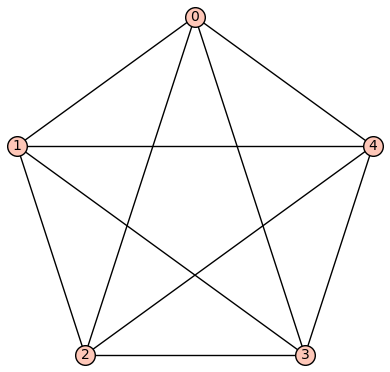

In [91]:
graphname="K5"
g=graphs.CompleteGraph(5)
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()

In [92]:
# graphname="K5"
# g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('1', '2'), ('1', '3'), ('1', '4'), ('2', '3'), ('2', '4'), ('3', '4')], multiedges=True)
# g.edges(labels=False)

In [93]:
# con_stab_l=run_all_verts(g)
#Elapsed time: mult_initializer : 15.673770904541016 seconds

Elapsed time: mult_initializer : 15.673770904541016 seconds
Number of vertices 5
The value (3, [[3, 0, 0, 1, 2], [3, 0, 0, 2, 1], [3, 0, 1, 0, 2], [3, 0, 1, 1, 1], [3, 0, 1, 2, 0], [3, 0, 2, 0, 1], [3, 0, 2, 1, 0], [3, 1, 0, 0, 2], [3, 1, 0, 1, 1], [3, 1, 0, 2, 0], [3, 1, 1, 0, 1], [3, 1, 1, 1, 0], [3, 1, 2, 0, 0], [3, 2, 0, 0, 1], [3, 2, 0, 1, 0], [3, 2, 1, 0, 0]]) outputs to stability condition 

Elapsed time: 1.0536315441131592 seconds
Number of vertices 5
The value (3, [[0, 3, 0, 1, 2], [0, 3, 0, 2, 1], [0, 3, 1, 0, 2], [0, 3, 1, 1, 1], [0, 3, 1, 2, 0], [0, 3, 2, 0, 1], [0, 3, 2, 1, 0], [1, 3, 0, 0, 2], [1, 3, 0, 1, 1], [1, 3, 0, 2, 0], [1, 3, 1, 0, 1], [1, 3, 1, 1, 0], [1, 3, 2, 0, 0], [2, 3, 0, 0, 1], [2, 3, 0, 1, 0], [2, 3, 1, 0, 0]]) outputs to stability condition 

Elapsed time: 1.0377933979034424 seconds
Number of vertices 5
The value (3, [[0, 0, 3, 1, 2], [0, 0, 3, 2, 1], [0, 1, 3, 0, 2], [0, 1, 3, 1, 1], [0, 1, 3, 2, 0], [0, 2, 3, 0, 1], [0, 2, 3, 1, 0], [1, 0, 3, 0, 2], [1

In [95]:
# save_data(graphname,con_stab_l)

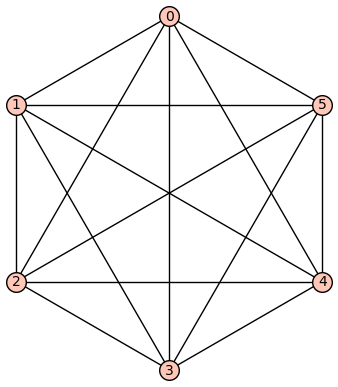

In [25]:
graphname="K6"
g=graphs.CompleteGraph(6)
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()
# len(list(g.spanning_trees())) #1296

In [79]:
# graphname="K6"
# g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '5'), ('3', '4'), ('3', '5'), ('4', '5')], multiedges=True)
# g.edges(labels=False)

[('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '5'), ('3', '4'), ('3', '5'), ('4', '5')]

In [15]:
# con_stab_l=run_all_verts(g)
#long time

In [ ]:
# save_data(graphname,con_stab_l)

## Large graphs

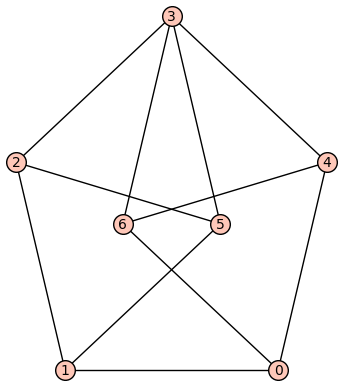

In [28]:
graphname="MoserSpindle"
g = graphs.MoserSpindle()
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()
# len(list(g.spanning_trees())) #192

In [81]:
# graphname="MoserSpindle"
# g=Graph([('0', '1'), ('0', '4'), ('0', '6'), ('1', '2'), ('1', '5'), ('2', '3'), ('2', '5'), ('3', '4'), ('3', '5'), ('3', '6'), ('4', '6')], multiedges=True)
# g.edges(labels=False)

[('0', '1'), ('0', '4'), ('0', '6'), ('1', '2'), ('1', '5'), ('2', '3'), ('2', '5'), ('3', '4'), ('3', '5'), ('3', '6'), ('4', '6')]

In [19]:
# con_stab_l=run_all_verts(g)
# Elapsed time: mult_initializer : 31.012927532196045 seconds

In [20]:
# save_data(graphname,con_stab_l)

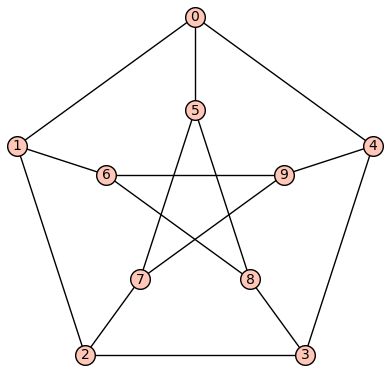

In [22]:
graphname="petersen_family_1"
g=graphs.petersen_family()[0]
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()

In [24]:
len(list(g.spanning_trees()))

2000

In [83]:
# graphname="petersen_family_1"
# g=Graph([('0', '1'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '6'), ('2', '3'), ('2', '7'), ('3', '4'), ('3', '8'), ('4', '9'), ('5', '7'), ('5', '8'), ('6', '8'), ('6', '9'), ('7', '9')], multiedges=True)
# g.edges(labels=False)

[('0', '1'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '6'), ('2', '3'), ('2', '7'), ('3', '4'), ('3', '8'), ('4', '9'), ('5', '7'), ('5', '8'), ('6', '8'), ('6', '9'), ('7', '9')]

In [ ]:
# con_stab_l=run_all_verts(g)

In [ ]:
# save_data(graphname,con_stab_l)

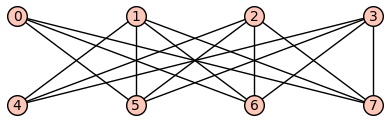

2304

In [36]:
graphname="petersen_family_3"
g=graphs.petersen_family()[3]
g.relabel({int(i):str(i) for i in range(g.order())})
g.show()
# len(list(g.spanning_trees())) 

In [ ]:
# for g in graphs.petersen_family():
#     print(g.order())

In [ ]:
g.edges()
# g=Graph([("0","1"),("1","2"),("2","3"),("0","2"),("1","3")], multiedges=True)

In [ ]:
# graphname="petersen_family_1"
# g=Graph([('0', '1'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '6'), ('2', '3'), ('2', '7'), ('3', '4'), ('3', '8'), ('4', '9'), ('5', '7'), ('5', '8'), ('6', '8'), ('6', '9'), ('7', '9')], multiedges=True)
g.edges(labels=False)

In [ ]:
con_stab_l=run_all_verts(g)
save_data(graphname,con_stab_l)

## Non-trivial stability conditions to non-trivial stability conditions by good move. <a name="s27"></a>

To generate more stability conditions we can take a sequence of cf's and then do,

    stab_con_0 --cf_0-->stab_con_1 --cf_1-->stab_con_2 --cf_2-->...

    where stab_con_0 is the break divisor case (we would have to have a way to choose which stab_con_1 to take from the 
    list produced from cf_0 application).

In [134]:
G=Graph([("0","1"),("1","2"),("2","0")], multiedges=True)

#Inital new stabiltiy condition
vrt=[1,0,0]
cf=[1,0,0]


#Dont work
# cf=[-1,0,0]

stab_con_l=graph_basecase_new_stab_cons(G,vrt,cf)
stab_con_l

# gm ((0, [[0, 0, 1], [0, 1, 0]]), [(Graph on 3 vertices, [0, 0, 0]), (Graph on 3 vertices, [0, 0, 0]), (Graph on 3 vertices, [0, 0, 0])]) 

# gm ((1, [[1, 0, 0]]), [(Graph on 3 vertices, [0, 0, 0]), (Graph on 3 vertices, [0, 0, 0])]) 

# The value (1, [[1, 0, 0]]) outputs to stability condition
# [([(Graph on 3 vertices, [-1, 0, 1]),
#    (Graph on 3 vertices, [-1, 1, 0]),
#    (Graph on 3 vertices, [0, 0, 0])],
#   array([[-1,  1,  1],
#          [ 0,  0,  1],
#          [ 0,  1,  0]], dtype=int32))]

gm ((0, [[0, 0, 1], [0, 1, 0]]), [(Graph on 3 vertices, [0, 0, 0]), (Graph on 3 vertices, [0, 0, 0]), (Graph on 3 vertices, [0, 0, 0])]) 

gm ((1, [[1, 0, 0]]), [(Graph on 3 vertices, [0, 0, 0]), (Graph on 3 vertices, [0, 0, 0])]) 

The value (1, [[1, 0, 0]]) outputs to stability condition


[([(Graph on 3 vertices, [-1, 0, 1]),
   (Graph on 3 vertices, [-1, 1, 0]),
   (Graph on 3 vertices, [0, 0, 0])],
  array([[-1,  1,  1],
         [ 0,  0,  1],
         [ 0,  1,  0]], dtype=int32))]

In [141]:
#Dont work
# vrt=[1,0,0]
# cf=[1,0,0]

#Dont work
# vrt=[0,1,0]
# cf=[0,1,0]

#Dont work
# vrt=[0,0,1]
# cf=[0,0,1]

#work
vrt=[1,0,0]
cf=[-1,0,0]

# gm ((-1, [[-1, 1, 1]]), [(Graph on 3 vertices, [-1, 0, 1]), (Graph on 3 vertices, [-1, 1, 0])]) 

# The value (-1, [[-1, 1, 1]]) outputs to stability condition 

# gm ((0, [[0, 0, 1], [0, 1, 0]]), [(Graph on 3 vertices, [-1, 0, 1]), (Graph on 3 vertices, [0, 0, 0]), (Graph on 3 vertices, [-1, 1, 0])]) 

# [([(Graph on 3 vertices, [0, 0, 0]),
#    (Graph on 3 vertices, [0, 0, 0]),
#    (Graph on 3 vertices, [0, 0, 0])],
#   array([[0, 0, 1],
#          [0, 1, 0],
#          [1, 0, 0]], dtype=int32))]

#work
# vrt=[0,1,0]
# cf=[0,-1,0]

# gm ((0, [[0, 0, 1]]), [(Graph on 3 vertices, [-1, 0, 1]), (Graph on 3 vertices, [0, 0, 0])]) 

# The value (0, [[0, 0, 1]]) outputs to stability condition 

# gm ((1, [[-1, 1, 1], [0, 1, 0]]), [(Graph on 3 vertices, [-1, 0, 1]), (Graph on 3 vertices, [-1, 1, 0]), (Graph on 3 vertices, [0, 0, 0])]) 

# [([(Graph on 3 vertices, [-1, 1, 0]),
#    (Graph on 3 vertices, [-1, 1, 0]),
#    (Graph on 3 vertices, [-1, 1, 0])],
#   array([[-1,  1,  1],
#          [-1,  2,  0],
#          [ 0,  1,  0]], dtype=int32))]

#work
# vrt=[0,0,1]
# cf=[0,0,-1]

# gm ((0, [[0, 1, 0]]), [(Graph on 3 vertices, [-1, 1, 0]), (Graph on 3 vertices, [0, 0, 0])]) 

# The value (0, [[0, 1, 0]]) outputs to stability condition 

# gm ((1, [[-1, 1, 1], [0, 0, 1]]), [(Graph on 3 vertices, [-1, 0, 1]), (Graph on 3 vertices, [-1, 1, 0]), (Graph on 3 vertices, [0, 0, 0])]) 

# [([(Graph on 3 vertices, [-1, 0, 1]),
#    (Graph on 3 vertices, [-1, 0, 1]),
#    (Graph on 3 vertices, [-1, 0, 1])],
#   array([[-1,  0,  2],
#          [-1,  1,  1],
#          [ 0,  0,  1]], dtype=int32))]

# #Dont work
# vrt=[1,0,0]
# cf=[-2,0,0]

nstab_con_l=reapply(G,stab_con_l,vrt,cf,pos=0)
nstab_con_l

gm ((0, [[0, 1, 0]]), [(Graph on 3 vertices, [-1, 1, 0]), (Graph on 3 vertices, [0, 0, 0])]) 

The value (0, [[0, 1, 0]]) outputs to stability condition 

gm ((1, [[-1, 1, 1], [0, 0, 1]]), [(Graph on 3 vertices, [-1, 0, 1]), (Graph on 3 vertices, [-1, 1, 0]), (Graph on 3 vertices, [0, 0, 0])]) 



[([(Graph on 3 vertices, [-1, 0, 1]),
   (Graph on 3 vertices, [-1, 0, 1]),
   (Graph on 3 vertices, [-1, 0, 1])],
  array([[-1,  0,  2],
         [-1,  1,  1],
         [ 0,  0,  1]], dtype=int32))]

## Commutativity <a name="s28"></a>

# Chip firing from break to new stabiltiy condition example (I3) then function generalising <a name="s1"></a>

From the break divisor case figure out what chip firings give a new_CSR and new_I.g

## I3: Initalise data <a name="s11"></a>

Fix a graph and get the set of break divisors B.

In [3]:
#Example
graphname="G3"
G=Graph([("0","1"),("1","2"),("2","0")], multiedges=True)
# for t in list(G.spanning_trees()):
#     print(t.edges())

NameError: name 'Graph' is not defined

In [ ]:
n=len(G.vertices())

#Assignments
zero_ass=[0]*n
base_assignments=[(T,zero_ass) for T in list(G.spanning_trees()) ]

#Break divisors:
B=w_stability(G,base_assignments) # list #We will use w_stability again to check if a proposed IG gives our CSR.

B=B.tolist()

## I3: Choose a CSR denoted by $S$ <a name="s12"></a>

For each $d \in B$ make a choice of a chip-firing divisor $C \in \mathbb{Z}^{n}$.

Take $S=\{d+CF(C) | b \in B\}$. 

This is the proposed set we are interested to find $I_G$ for.

In [12]:
# #how we generate a new CSR.

# #Make a choice of chip-firing divisors C's

# #Example
c1=[1,0,0]
c2=c3=[0]*n

CF=[c1,c2,c3]

paired=zip(B,CF)
# print(list(paired))

#We build new csr.
S=[]
for D,C in paired:
    s=chip_fire(G,D,C)
    S.append(s)

In [13]:
S

[[-2, 1, 2], [0, 1, 0], [1, 0, 0]]

In [14]:
# Take S that I know and check if get same Ig back
# S=[[1,0,0],[0,1,0],[0,0,1]]
S=[[1,0,0],[0,1,0],[1,1,-1]]

S=[np.array(D) for D in S]

## I3: Chip-subtract to get $Ass_{G}$ <a name="s13"></a>

Generalising the idea of "generates the divisors after specializing along one edge".

Let $Ass_{G}$ be the datum such that for each tree $T \in \mathcal{ST}(G)$, $Ass_{G}(T) \subseteq Div(G)^{0}$ (this is the set of possible $I_G(T)$ values).

Let $B_{T}$ be the set of break divisors of $G$ with respect to $T$.

In [15]:
# Get B_T for each T

#dictionary?
breaks_T={}

G_edges=G.edges(sort=True, labels=True)

for T in list(G.spanning_trees()):
    B_T=chip_adding(G_edges,T.edges(),zero_ass) #list of break divisors for T.
    
    breaks_T[T.copy(immutable=True)]=B_T

In [16]:
breaks_T

{Graph on 3 vertices: [array([0., 1., 0.]), array([1., 0., 0.])],
 Graph on 3 vertices: [array([0., 0., 1.]), array([1., 0., 0.])],
 Graph on 3 vertices: [array([0., 0., 1.]), array([0., 1., 0.])]}

We obtain $Ass_{G}(T)$ as follows,

$$Ass_{G}(T)=\bigcup_{D \in S} \{D-b | b\in B_{T}\}.$$

"and check that adding chips brings you back to the "covering" stability set".

For each $T$. Want to reduce the number of cases to check in $Ass_{G}(T)$. Therefore we ask for $E \in Ass_{G}(T)$ if 

$$CA(E) = \{E + b| b \in B_{T}\} \subseteq S.$$

If $CA(E) \subseteq S$  we keep $E \in Ass_{G}(T)$, if not we discard $E$ from $Ass_{G}(T)$.

In [19]:
#get $Ass_{G}(T)$

Ass_G={}
for T in list(G.spanning_trees()):
    #get break divisors for G wrt to T
    breaks=breaks_T[T.copy(immutable=True)]

    #Get all possible Ig(T) values    
    candidates=[]
    for D in S:
        for b in breaks:
            candidates.append(D-b)

    # Refine candidates to ensure CA(E) contained in S
    refined_candidates=[]
    for cand in candidates:

        #Generate Ca(E)
        check=set()
        for b in breaks:
            s=cand+b
            check.add(tuple(s))

        S=[tuple(s) for s in S]#S is a list of nparray
        if check.issubset(S):
            refined_candidates.append(cand)

    Ass_G[T.copy(immutable=True)]=refined_candidates
# We can get multiple repetitions in values for each tree as these are not sets.
Ass_G_as_set = {k: np.unique(v, axis=0).tolist() for k, v in Ass_G.items()}

In [20]:
Ass_G=Ass_G_as_set
Ass_G

{Graph on 3 vertices: [[0.0, 0.0, 0.0]],
 Graph on 3 vertices: [[0.0, 1.0, -1.0]],
 Graph on 3 vertices: [[1.0, 0.0, -1.0]]}

## I3: Compute $I_{G}$ from refined $Ass_{G}$ <a name="s14"></a>

Iterate through all possible $Ass_G(T)$ to get choices of assignments $A_G$ (Using itertools).

And check if by taking the chip-adding saturation of $A$ returns $S$.

Stop if does.

Else try a new $S$ by taking a different choice of chip-firing divisors $C$ for each break divisor.

In [21]:
choices = []

for combination in itertools.product(*Ass_G.values()):
    choices.append([(key, value) for key, value in zip(Ass_G.keys(), combination)])

In [22]:
# print(result)
for i in choices:
    print(i)

[(Graph on 3 vertices, [0.0, 0.0, 0.0]), (Graph on 3 vertices, [0.0, 1.0, -1.0]), (Graph on 3 vertices, [1.0, 0.0, -1.0])]


In [23]:
for A in choices:
    
    #We now take the chip-adding saturation of A
#   and check if A gives back S

    S_better_form = np.array(S, dtype=np.int32)
    CA_A=w_stability(G,A)
        
    #we put CA_A and S into a set of tuples format. 

    CA_A_set_t=set([tuple(i) for i in CA_A.tolist()])

    S_set_t=set([tuple(i) for i in S])

    if CA_A_set_t==S_set_t:
        #if true returns A ie. IG function.
        print(A)

[(Graph on 3 vertices, [0.0, 0.0, 0.0]), (Graph on 3 vertices, [0.0, 1.0, -1.0]), (Graph on 3 vertices, [1.0, 0.0, -1.0])]


## I4: Generalised to a function format and apply to I4. <a name="s15"></a>

In [10]:
#G4 #(1342) example
G=Graph([("0","1"),("1","2"),("2","3"),("3","0")], multiedges=True)

#break divisor case.
# CF=[[0]*4,[0]*4,[0]*4,[0]*4]
# S=get_new_CSR(G,CF)

In [11]:
#Non-trivial 1342 case.
S=[[0,1,0,0],[0,1,-1,1],[1,1,-1,0],[1,0,0,0]]

# # choice of assignment i want 

# [("1","2"),("2","3"),("3","0"):[0,0,0,0],
# ("0","1"),("2","3"),("3","0"):[1,0,-1,0],
# ("0","1"),("1","2"),("3","0"):[0,1,-1,0],
# ("0","1"),("1","2"),("2","3"):[0,1,-1,0]]]

In [12]:
breaks_T=get_breaks_T(G)

In [13]:
breaks_T

{Graph on 4 vertices: [array([0., 1., 0., 0.]), array([1., 0., 0., 0.])],
 Graph on 4 vertices: [array([0., 0., 0., 1.]), array([1., 0., 0., 0.])],
 Graph on 4 vertices: [array([0., 0., 1., 0.]), array([0., 1., 0., 0.])],
 Graph on 4 vertices: [array([0., 0., 0., 1.]), array([0., 0., 1., 0.])]}

In [30]:
Ass_G=get_Ass_G(G,S,breaks_T)
Ass_G

{Graph on 4 vertices: [[0.0, 0.0, 0.0, 0.0]],
 Graph on 4 vertices: [[0.0, 1.0, -1.0, 0.0]],
 Graph on 4 vertices: [[1.0, 0.0, -1.0, 0.0]],
 Graph on 4 vertices: [[0.0, 1.0, -1.0, 0.0]]}

In [31]:
choices=get_all_choices_of_assignments(Ass_G)
Ig=get_Ig(choices)

In [32]:
print(Ig)

([(Graph on 4 vertices, [0.0, 0.0, 0.0, 0.0]), (Graph on 4 vertices, [0.0, 1.0, -1.0, 0.0]), (Graph on 4 vertices, [1.0, 0.0, -1.0, 0.0]), (Graph on 4 vertices, [0.0, 1.0, -1.0, 0.0])], {(0, 1, -1, 1), (1, 0, 0, 0), (0, 1, 0, 0), (1, 1, -1, 0)})


## I4: Searching for good CF to give a new stability condition <a name="s16"></a>

In [16]:
#G4 #(1342) example
G=Graph([("0","1"),("1","2"),("2","3"),("3","0")], multiedges=True)

#break divisor case.
CF=[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

#See good move classes
# non-trivial
# CF=[[0,0,0,0],[0,0,0,0],[0,1,0,0],[0,0,0,0]]
# ([(Graph on 4 vertices, [0.0, -1.0, 1.0, 0.0]), (Graph on 4 vertices, [0.0, 0.0, 0.0, 0.0]), (Graph on 4 vertices, [1.0, -1.0, 0.0, 0.0]), (Graph on 4 vertices, [0.0, 0.0, 0.0, 0.0])], {(0, 0, 0, 1), (1, 0, 0, 0), (0, 0, 1, 0), (1, -1, 1, 0)})

In [17]:
S=get_new_CSR(G,CF)
breaks_T=get_breaks_T(G)#independant of CF
breaks_T

{Graph on 4 vertices: [array([0., 1., 0., 0.]), array([1., 0., 0., 0.])],
 Graph on 4 vertices: [array([0., 0., 0., 1.]), array([1., 0., 0., 0.])],
 Graph on 4 vertices: [array([0., 0., 1., 0.]), array([0., 1., 0., 0.])],
 Graph on 4 vertices: [array([0., 0., 0., 1.]), array([0., 0., 1., 0.])]}

In [18]:
Ass_G=get_Ass_G(G,S,breaks_T)
Ass_G

{Graph on 4 vertices: [[0.0, 0.0, 0.0, 0.0]],
 Graph on 4 vertices: [[0.0, 0.0, 0.0, 0.0]],
 Graph on 4 vertices: [[0.0, 0.0, 0.0, 0.0]],
 Graph on 4 vertices: [[0.0, 0.0, 0.0, 0.0]]}

In [19]:
choices=get_all_choices_of_assignments(Ass_G)
Ig=get_Ig(choices)

In [20]:
print(Ig)

([(Graph on 4 vertices, [0.0, 0.0, 0.0, 0.0]), (Graph on 4 vertices, [0.0, 0.0, 0.0, 0.0]), (Graph on 4 vertices, [0.0, 0.0, 0.0, 0.0]), (Graph on 4 vertices, [0.0, 0.0, 0.0, 0.0])], {(0, 0, 0, 1), (1, 0, 0, 0), (0, 1, 0, 0), (0, 0, 1, 0)})


# Functions <a name="s3"></a>

## General functions <a name="s31"></a>

In [1]:
import numpy as np
from collections import Counter
import itertools 
# import sys
import pickle
import time


In [2]:
def pickle_dic_l(graphname,stab_l):
    # Pickle the list
    filename=f"../examples/{graphname}.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(stab_l, f)
    return

# # def unpickle_dic_l(graphname):
# #     # Unpickle the list
# #     filename=f"examples/{graphname}/phi_analysis/dic_l.pkl"
# #     with open(filename, 'rb') as f:
# #         unpickled_list = pickle.load(f)
# #     return unpickled_list

In [3]:
def chip_fire(G,D,C):
    
    """
    objective: chip-fire by C on D.
    Input:D is our inital divisors, C is chip firing divisor.
    returns: new divisor after chip-firing by C
    """

    # Need to convert vertices to integers.

    F=G.copy()
    n=len(F.vertices())
    F.relabel({str(i): int(i) for i in range(n)})
    
    S = Sandpile(F, 0)   # create the sandpile

    D = np.array(D)

    # https://doc.sagemath.org/html/en/thematic_tutorials/sandpile.html#betti-numbers-for-undirected-graphs

    """
        # #Issue.

        # #Get chips on sandpile for out initial break divisor.
        # b = [0,0,1]
        # break_chips = {int(index):int(value) for index, value in enumerate(b)}
        # print(break_chips)


        # # c = SandpileConfig(S, {0:0, 1:0, 2:1})
        # # c = SandpileConfig(S, break_chips)
        # # c = SandpileConfig(S, b)

        # # c.fire_vertex(0)
    """

    # work around

    L=S.laplacian()

    # given b firing the vertice 0, n times corresponds to subtracting the 0th element of L_l from b, n times

    L_l=list(np.array(L))

    #chip-firing
    cf = sum(C[i] * L_l[i] for i in range(len(L_l)))

    #result after chip-firing on 
    chip_fired_D=list(D-cf)

    return chip_fired_D

In [4]:
# Assignment_datum_for_G for w_stability:

def list_difference(a, b):
    """
    Objective:Takes the difference of removing the 2nd term from the 1st.
    """
    
    "https://stackoverflow.com/questions/8106227/difference-between-two-lists-with-duplicates-in-python"
    count = Counter(a) # count items in a
    count.subtract(b)  # subtract items that are in b
    diff = []
    for x in a:
        if count[x] > 0:
           count[x] -= 1
           diff.append(x)
    return diff

def chip_adding(graph,tree,ass): #new
    """
    Objective:Chip-adds
    Inputs:
    graph: G_edges graph edges
    tree : spanning tree of graph
    ass : an n=vert(graph) tuple on the spanning tree.
    
    recursion idea: https://stackoverflow.com/questions/53638816/python-library-function-to-re-apply-a-function-to-its-own-output-until-output-re
    """
    
    edges=graph # just want the edges 
    n=len(ass)
    complement=list_difference(graph,tree) #edges in complement.
    
    def rec_funct(edge_l,inputs,n):
        data=[]
        edge=edge_l[0]
        
        for b in inputs:
            delta_1=np.zeros(n)
            delta_2=np.zeros(n)
            
            delta_1[int(edge[0])]=1 #we chip add at the first vertex. #### <- CHANGED as taking vertices 0,..,n-1 now
            delta_2[int(edge[1])]=1 #we chip add at the second vertex.
            
            b1=b+delta_1
            b2=b+delta_2
            data=data+[b1,b2]
        
        return (edge_l,data,n)
    
    def recursion(edge_l,inputs,n):
        
        new_data=rec_funct(edge_l,inputs,n)
        edge_l=edge_l[1:] #removeing first edge        
        new_data=(edge_l,new_data[1],new_data[2])
                
        if len(edge_l)==0:
            new_inputs=new_data[1]
            return new_inputs
        else:
            return recursion(*new_data)
        
    breaks=recursion(complement,[np.zeros(n)],n)
    breaks=np.unique(breaks, axis=0)
    
    patch=[]
    for bbreak in breaks:
        patch.append(ass+bbreak)
    
    return patch

def w_stability(graph,Assignments): #Newest
    
    """
    Objective:Takes the chip-adding saturation of the assignments.
    
    #Graphs are labelled v0 to v_n-1
    Inputs:
        graph: Any smallish finite multigraph
        
        Assignments= list of (T,ass) tree and assignment pairs.
    
    Outputs: a list of lists of length vert(graph) corresponding to line bundle multidegrees obtained by chip adding.
    """
    G=graph
    
    G_edges=G.edges(sort=True, labels=True)
    
    lbm_patches=[] # the set of patches,which we'll take the union of. 

    for pair in Assignments:
        tree_edges=pair[0].edges()
        ass=pair[1]    
        patch=chip_adding(G_edges,tree_edges,ass)              
        lbm_patches.append(patch)
    
    sig=np.concatenate(lbm_patches, axis=0)
    sig=sig.astype('int32')    
    sig=np.unique(sig, axis=0)

    return sig

## Investigating Good moves <a name="s32"></a>

In [5]:
def convert_format(stab_l):
    
    """
    - TODO: Reformat data so can be save in format for phi investigation.

    from 

    [([(Graph on 3 vertices, [-1, 0, 1]),
    (Graph on 3 vertices, [-1, 1, 0]),
    (Graph on 3 vertices, [0, 0, 0])],
    array([[-1,  1,  1],
    [ 0,  0,  1],
    [ 0,  1,  0]], dtype=int32))]
    to 

    # # format for data to be stored in.

    # ([[0, 0, 0], [0, 0, 0], [0, 0, 0]], 
    #  array([[0, 0, 1],
    #        [0, 1, 0],
    #        [1, 0, 0]], dtype=int32),

    #  [(Graph on 3 vertices, [0, 0, 0]), (Graph on 3 vertices, [0, 0, 0]), (Graph on 3 vertices, [0, 0, 0])],
    #  [(Multi-graph on 3 vertices, (1, 3, 2), Multi-graph on 3 vertices)])

    
    """
    
    
    converted_stab_l=[]
    for stab in stab_l:
    
        Ig,gb=stab
        ass_l=[ass[1] for ass in Ig ]
        
        
        
        converted_stab_l.append((ass_l,gb,Ig,None))
    
    return converted_stab_l

In [6]:
def get_break_ass_dic(G,csr,assignments):
    
    """
    desc: create dic where each key is each divisor in csr=sigma{Gamma}(Gamma)
    where we get a list of (T,ass) which saturate to give b in csr
    in: csr is gen break divisors, assignments the list of (T,ass).
    csr is a list of lists
    out: gmclass
    """
    
    gm_class=dict()

    for b in csr:
        asspairs_to_b=[]

        for pair in assignments:
            sat=saturation(G,pair)

            if b in sat:
                asspairs_to_b.append(pair)
        gm_class[tuple(b)]=asspairs_to_b
    return gm_class

def genbreaks_per_vert(csr,vrt):
    
    """
    description:
    input: csr is the set of generalised break divs, cf is the chip firing on [0,0,1,0] on the vertex.
    output: list of lists where each list contains b in csr with the value in values in position cf.
    x=[[0,0,1],[1,0,0],[1,2,1]]

    cf=[0,1,0]
    i.e. [(0, [[0, 0, 1], [1, 0, 0]]), (2, [[1, 2, 1]])] increasing order of the value on the cf position.
    Consider the first index the value and take the list of terms for the range of values ie
    """
    
    values=list(sorted(set(b[vrt.index(1)] for b in csr )))

    gclass=[]
    for i in values:
        t=[]
        for y in csr:
            if y[vrt.index(1)]==i:
                t.append(y)
        gclass.append((i,t))

    return gclass

def good_move_class_per_vert(G,csr,Ig,vrt,cf,b_sat_trees):
    
    """
    desc: get the good move class.
    in:csr is the complete set of reps  (gen breaks), cf is where we will be chip-firing i.e the vertex of interest.
    out: Returns a list of terms of the form,
            ([1, 0, 0, 0],
         [(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])],
         (1, [[1, 0, 0, 0]]))
         
     for each distinct value on vertex cf ranging over b in generalised breaks.
    """
    
    #gen breaks class for cf per value.
    gb_c_top=genbreaks_per_vert(csr,vrt)
    
    """
    # For each vertex ask what are the good move classes 
    # (value 0 for break not included but have to be careful wrt general working).

    # #Take b in csr with value i in position cf: giving (i,[breaks..])
    gc_top=genbreaks_per_vert(csr,vrt)
    # # gc_top # [(0, [[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]]), (1, [[1, 0, 0, 0]])]
    """

    
#     print("gb_c_top",gb_c_top)

    # b_sat_trees

    # b_sat_trees=get_break_ass_dic(G,csr,Ig)

    
    good_move_classes=[]
    for v_gb_pair in gb_c_top:

        value,g_breaks=v_gb_pair

        #get assignments which chip add to give (atleast one of) these breaks.
        
        s=[]
        for b in g_breaks:
#             print(b_sat_trees[tuple(b)])
            #Want to take the union of these assignments
            s.extend(b_sat_trees[tuple(b)])
        #take only unique assinments
        ass_good_move_class=list(dict(s).items())

        # if the value on the cf vertex does not change ie all assinments are the same? 
        
        """
        not all classes generated in this way will give a new Ig function. But this method will exhaust them all.
        So we just need to apply some conditions to those that do not. This is not an issue if we only focus
        on break divisors, then we only consider cases where that value is greater that 0.
        """

        good_move_class_per_val=(v_gb_pair,ass_good_move_class)
        
        good_move_classes.append(good_move_class_per_val)

    return good_move_classes

def saturation(graph,Assignment): #Newest
    
    """
    Objective:Takes the chip-adding saturation of a assignment (the saturation)
    
    #Graphs are labelled v0 to v_n-1
    Inputs:
        graph: Any smallish finite multigraph
        
        Assignment= (T,ass) tree and assignment pairs.
    
    Outputs: a list of lists of length vert(graph) corresponding to line bundle multidegrees obtained by chip adding.
    """
    G=graph
    
    G_edges=G.edges(sort=True, labels=True)
    
    tree_edges=Assignment[0].edges()
    ass=Assignment[1]    
    patch=[chip_adding(G_edges,tree_edges,ass)]
#     print(patch)
    
    sig=np.concatenate(patch, axis=0)
    sig=sig.astype('int')    
    sig=np.unique(sig, axis=0)

    return sig.tolist()

def good_move_induced_stabconl_per_vert(G,Ig,vrt,cf):
    
#     start_time = time.time()
#     print("start0")


    """
    Description
    Inputs:
    
    G : graph
    Ig : list of (T,ass)
    vrt : the [0...1...0] on the ith position. 
    cf : is the chip firing we want on vrt (on the assignments on trees in selected assignments)
    
    Outputs:
    new_stab_cons : A list of (new_Ig,new_gb)
    """

    #Init:
    #get generalised break divs
    csr=w_stability(G,Ig).tolist() # [[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]]

    #get dic of of (key,val) such that key = generalised break divisor b, 
    # and value is a list of (t,ass) that chip-add to give b.
    b_sat_trees=get_break_ass_dic(G,csr,Ig)

    """
    For each (i,[breaks..]) of gc_top (obtained by good_move_class_per_vert()).
    Ask what are the assignments (T,ass) that chip-add to give atleast one item of (i,[breaks..]).
    We will use these "selected assignments" to produce a new_Ig function after chip firing.
    Note: Not all of those produce a "good move class" so we will have to check 
    (Are these assignments constant on the vertex cf?). 
    """
    
#     end_time = time.time()
#     elapsed_time = end_time - start_time
#     print(f" Elapsed time initialise: {elapsed_time} seconds")
    
    # Here we iterate through gc_top (remember the different values on the vertes cf)
    # to obtain "selected assignments" and then package the data together.

#     start_time = time.time()
#     print("start1")

    GM=good_move_class_per_vert(G,csr,Ig,vrt,cf,b_sat_trees)
    
#     # End timing
#     end_time = time.time()
#     # Calculate the elapsed time
#     elapsed_time = end_time - start_time
#     # Print the elapsed time
#     print(f" Elapsed time good_move_class_per_vert: {elapsed_time} seconds")

#     Given a "good move class" take the "selected assignments" and chip-fire these on CF to obtain the assignments we want to use in the new Ig.

    new_stab_cons=[]
    for gm in GM:
        

        
#         print("gm",gm,"\n")

        #Take the assignemnts of the "good move class" (still dont know if its a true good move class yet,
        # might not give stabiltiy condition)

        selected_ass=gm[1] #[(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])]

        #Take the (T,ass) in selected_ass and convert to (T,chip firied ass by cf).

        cf_selected_ass=[] # cf_selected_ass #[(Graph on 4 vertices, [-1, 0, 0, 1]), (Graph on 4 vertices, [-1, 1, 0, 0])]
        for ass in selected_ass:
            T,div=ass
            cf_div=chip_fire(T.copy(immutable=False),div,cf)
            cf_selected_ass.append((T.copy(immutable=True),cf_div))

        # Build new I_G function by joining cf_selected_ass with the complement on selected_ass in base_assignments (starting Ig).

        complement_ass = [ass for ass in Ig if ass not in selected_ass]
        new_Ig=cf_selected_ass+complement_ass

        """
        Test new I_G by taking saturation of new_Ig to get possible_new_gb 
        If possible_new_gb is correct size on top then new_gb=possible_new_gb.
        This will give us a new stability condition.
        """

        possible_new_gb=w_stability(G,new_Ig)

        complexity=len(Ig)
        
#         print(Ig)
#         print(f"length of possible_new_gb: {possible_new_gb}")
        
        if possible_new_gb.shape[0]==complexity:
            new_gb=possible_new_gb
            new_stab_cons.append((new_Ig,new_gb))
            
            print(f"The value {gm[0]} outputs to stability condition \n")


    return new_stab_cons

def graph_basecase_new_stab_cons(G,vrt,cf):
    
    #Take break divisor case

    #Init:
    n=len(G.vertices())
    zero_ass=[0]*n
    Ig=[(T.copy(immutable=True),zero_ass) for T in list(G.spanning_trees()) ]    
    
    new_stabs_v=good_move_induced_stabconl_per_vert(G,Ig,vrt,cf)
    
    return new_stabs_v

In [7]:
def vrt_cf(G,vrt_pos=0,cf_pos=0,cf_val=1):
    
    """
    Instead of writting vrt=[1,0,0,0]
    cf=[1,0,0,0] always
    """
    
    n=len(G.vertices())
    
    vrt_l = [0] * n  # create a list of n zeros
    vrt_l[vrt_pos] = 1    # set the i-th position to 1
    
    cf_l = [0] * n  # create a list of n zeros
    cf_l[cf_pos] = cf_val    # set the i-th position to 1

    return vrt_l,cf_l

def test_g(G,vrt_pos=0,cf_pos=0):
    
    
    #Asks if gives stabiltiy condition in reasonable time?
    H=G.copy()
    
    # Start timing
    start_time = time.time()
    n=H.order()
    
    
    print(f"Number of vertices {G.order()}")

    #Inital new stabiltiy condition

    vrt,cf=vrt_cf(H,vrt_pos,cf_pos)

    stab_con_l=graph_basecase_new_stab_cons(H,vrt,cf)
    
    # End timing
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    # Print the elapsed time
    print(f"Elapsed time: {elapsed_time} seconds")
    
    return stab_con_l

In [8]:
#running over multiple test_g()

def mult_initializer(G):
    #Takes a long time for large graphs.

    """
    To prevent repeated calculation when running over test_g(i,i).

    """

    #Init:
    n=len(G.vertices())
    zero_ass=[0]*n
    Ig=[(T.copy(immutable=True),zero_ass) for T in list(G.spanning_trees()) ]   


    #get generalised break divs
    csr_o=w_stability(G,Ig).tolist() # [[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]]

    #get dic of of (key,val) such that key = generalised break divisor b, 
    # and value is a list of (t,ass) that chip-add to give b.
    b_sat_trees_o=get_break_ass_dic(G,csr_o,Ig)

    return Ig,csr_o,b_sat_trees_o
    

def mult_good_move_induced_stabconl_per_vert(G,csr,b_sat_trees,Ig,vrt,cf):
    

    """
    Description
    Inputs:
    
    G : graph
    Ig : list of (T,ass)
    vrt : the [0...1...0] on the ith position. 
    cf : is the chip firing we want on vrt (on the assignments on trees in selected assignments)
    
    Outputs:
    new_stab_cons : A list of (new_Ig,new_gb)
    """



    """
    For each (i,[breaks..]) of gc_top (obtained by good_move_class_per_vert()).
    Ask what are the assignments (T,ass) that chip-add to give atleast one item of (i,[breaks..]).
    We will use these "selected assignments" to produce a new_Ig function after chip firing.
    Note: Not all of those produce a "good move class" so we will have to check 
    (Are these assignments constant on the vertex cf?). 
    """
    
    # Here we iterate through gc_top (remember the different values on the vertes cf)
    # to obtain "selected assignments" and then package the data together.


    GM=good_move_class_per_vert(G,csr,Ig,vrt,cf,b_sat_trees)
    


#     Given a "good move class" take the "selected assignments" and chip-fire these on CF to obtain the assignments we want to use in the new Ig.

    new_stab_cons=[]
    for gm in GM:
        #Take the assignemnts of the "good move class" (still dont know if its a true good move class yet,
        # might not give stabiltiy condition)

        selected_ass=gm[1] #[(Graph on 4 vertices, [0, 0, 0, 0]), (Graph on 4 vertices, [0, 0, 0, 0])]

        #Take the (T,ass) in selected_ass and convert to (T,chip firied ass by cf).

        cf_selected_ass=[] # cf_selected_ass #[(Graph on 4 vertices, [-1, 0, 0, 1]), (Graph on 4 vertices, [-1, 1, 0, 0])]
        for ass in selected_ass:
            T,div=ass
            cf_div=chip_fire(T.copy(immutable=False),div,cf)
            cf_selected_ass.append((T.copy(immutable=True),cf_div))

        # Build new I_G function by joining cf_selected_ass with the complement on selected_ass in base_assignments (starting Ig).

        complement_ass = [ass for ass in Ig if ass not in selected_ass]
        new_Ig=cf_selected_ass+complement_ass

        """
        Test new I_G by taking saturation of new_Ig to get possible_new_gb 
        If possible_new_gb is correct size on top then new_gb=possible_new_gb.
        This will give us a new stability condition.
        """

        possible_new_gb=w_stability(G,new_Ig)

        complexity=len(Ig)
        
        if possible_new_gb.shape[0]==complexity:
            new_gb=possible_new_gb
            new_stab_cons.append((new_Ig,new_gb))
            
            print(f"The value {gm[0]} outputs to stability condition \n")


    return new_stab_cons

def mult_test_g(G,csr,b_sat_trees,Ig,vrt_pos=0,cf_pos=0):#done for now
    
    
    #Asks if gives stabiltiy condition in reasonable time?
    H=G.copy()
    
    # Start timing
    start_time = time.time()
    n=H.order()
    
    
    print(f"Number of vertices {G.order()}")

    #Inital new stabiltiy condition

    vrt,cf=vrt_cf(H,vrt_pos,cf_pos)

    stab_con_l=mult_good_move_induced_stabconl_per_vert(H,csr,b_sat_trees,Ig,vrt,cf)
    
    # End timing
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    # Print the elapsed time
    print(f"Elapsed time: {elapsed_time} seconds")
    
    return stab_con_l

#running large graphs get stabilities near break divisor case.
def run_all_verts(g):
    
    start_time = time.time()
    Ig,csr,b_sat_trees=mult_initializer(g)
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Elapsed time: mult_initializer : {elapsed_time} seconds")

    stab_l=[]
    for vrt in range(g.order()):
        stab_l.extend(mult_test_g(g,csr,b_sat_trees,Ig,vrt,vrt))
    con_stab_l=convert_format(stab_l)
    
    return con_stab_l

In [ ]:
def reapply(G,stab_con_l,vrt,cf,pos=0):
    
    ## Non-trivial stability conditions to non-trivial stability conditions by good move.
    
    #No longer in the base case.
    
    # Get list of stab conditions for any stability conditions from a list of stab conditions from previous case.

    
    stab_con=stab_con_l[pos]

    new_stab_Ig=stab_con[0]

    new_stabs_v=good_move_induced_stabconl_per_vert(G,new_stab_Ig,vrt,cf)
    
    return new_stabs_v

In [10]:
def save_data(graphname,stab_l):
    # Pickle the list
    filename=f"examples/{graphname}.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(stab_l, f)
    return

def load_data(graphname):
    # Unpickle the list
    filename=f"examples/{graphname}.pkl"
    with open(filename, 'rb') as f:
        unpickled_list = pickle.load(f)
    return unpickled_list

## Given a chip firings obtain a new stabiltiy condition for I3 graph <a name="s33"></a>

In [11]:

def get_new_CSR(G,CF):
    
    """
    Applies each cf in CF to a break is CSR (in order), returns new_CSR
    """
    
    n=len(G.vertices())

    zero_ass=[0]*n
    base_assignments=[(T,zero_ass) for T in list(G.spanning_trees()) ]

    #Break divisors:
    B=w_stability(G,base_assignments).tolist() # list

    #We will use w_stability again to check if a proposed IG gives our CSR.
    
    paired=zip(B,CF)
    # print(list(paired))

    #We build new csr.
    S=[]
    for D,C in paired:
        s=chip_fire(G,D,C)
        S.append(s)
        
    csr=S
    
    return csr

def get_breaks_T(G):
    
    """
    Obj:Get the set of break divisors B_T for each T

    Input:
    Output: a dictionary of Tree:list of break divisors b where b is np.array
    
    {Graph on 3 vertices: [array([0., 1., 0.]), array([1., 0., 0.])],
     Graph on 3 vertices: [array([0., 0., 1.]), array([1., 0., 0.])],
     Graph on 3 vertices: [array([0., 0., 1.]), array([0., 1., 0.])]}
    """
    n=len(G.vertices())
    zero_ass=[0]*n
    breaks_T={}

    G_edges=G.edges(sort=True, labels=True)

    for T in list(G.spanning_trees()):
        B_T=chip_adding(G_edges,T.edges(),zero_ass) #list of break divisors for T.

        breaks_T[T.copy(immutable=True)]=B_T
    return breaks_T    

def get_Ass_G(G,S,breaks_T):
    
    """
    Obj:
    Input:
    Returns: dictionary of 
    """

    #get $Ass_{G}(T)$
    
    #So we can use set notation.
    S=[tuple(s) for s in S]#S is a list of nparray


    Ass_G={}
    for T in list(G.spanning_trees()):
        #get break divisors for G wrt to T
        breaks=breaks_T[T.copy(immutable=True)]
        
        #Get all possible Ig(T) values    
        candidates=[]
        for D in S:
            for b in breaks:
                candidates.append(D-b)

        # Refine candidates to ensure CA(E) contained in S
        refined_candidates=[]
        for cand in candidates:

            #Generate Ca(E)
            check=set()
            for b in breaks:
                s=cand+b
                check.add(tuple(s))
                
            if check.issubset(S):
                refined_candidates.append(cand)

        Ass_G[T.copy(immutable=True)]=refined_candidates
    # We can get multiple repetitions in values for each tree as these are not sets.
    Ass_G_as_set = {k: np.unique(v, axis=0).tolist() for k, v in Ass_G.items()}

    return Ass_G_as_set

def get_all_choices_of_assignments(Ass_G):

    """
    Input: Ass_G is a dictionary of possible Ig values
    May be large.
    returns: possible a list of choices of assignments of the form 
    [(Graph on 3 vertices, [0.0, 0.0, 0.0]), (Graph on 3 vertices, [0.0, 1.0, -1.0]), (Graph on 3 vertices, [1.0, 0.0, -1.0])]
    """
    choices = []

    for combination in itertools.product(*Ass_G.values()):
        choices.append([(key, value) for key, value in zip(Ass_G.keys(), combination)])
    return choices

def get_Ig(choices):
    
    """
    Obj:
    Input:
    Output:
    A: the choice of assignments list of form (T,ass_t)
    CA_A_set_t: a set of divisors of degree g i.e. S 
    """
    
    for A in choices:

        #We now take the chip-adding saturation of A
    #   and check if A gives back S

        S_better_form = np.array(S, dtype=np.int32)
        CA_A=w_stability(G,A)

        #we put CA_A and S into a set of tuples format. 

        CA_A_set_t=set([tuple(i) for i in CA_A.tolist()])
        S_set_t=set([tuple(i) for i in S])

        if CA_A_set_t==S_set_t:
            #if true returns A ie. IG function.
            return A,CA_A_set_t
    return None

In [ ]:
wheel_graph_family:

graphname="Wheel_4"
# g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('1', '2'), ('1', '3'), ('2', '3')], multiedges=True)

graphname="Wheel_5"
# g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('1', '2'), ('1', '4'), ('2', '3'), ('3', '4')], multiedges=True)

graphname="Wheel_6"
# g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '5'), ('2', '3'), ('3', '4'), ('4', '5')], multiedges=True)

graphname="Wheel_7"
g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '5'), ('2', '3'), ('3', '4'), ('4', '5')], multiedges=True)

complete_bipartite_graph_family:

graphname="K24"
g=Graph([('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5')], multiedges=True)

graphname="K25"
g=Graph([('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6')], multiedges=True)

graphname="K33"
g=Graph([('0', '3'), ('0', '4'), ('0', '5'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '5')], multiedges=True)

graphname="K34"
g=Graph([('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('2', '3'), ('2', '4'), ('2', '5'), ('2', '6')], multiedges=True)

complete_graph_family:

graphname="K5"
g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('1', '2'), ('1', '3'), ('1', '4'), ('2', '3'), ('2', '4'), ('3', '4')], multiedges=True)

graphname="K6"
g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '5'), ('3', '4'), ('3', '5'), ('4', '5')], multiedges=True)


Larger graphs:


graphname="MoserSpindle"
g=Graph([('0', '1'), ('0', '4'), ('0', '6'), ('1', '2'), ('1', '5'), ('2', '3'), ('2', '5'), ('3', '4'), ('3', '5'), ('3', '6'), ('4', '6')], multiedges=True)


graphname="petersen_family_1"
g=Graph([('0', '1'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '6'), ('2', '3'), ('2', '7'), ('3', '4'), ('3', '8'), ('4', '9'), ('5', '7'), ('5', '8'), ('6', '8'), ('6', '9'), ('7', '9')], multiedges=True)




In [14]:
wheel_graph_family:

graphname="Wheel_4"
# g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('1', '2'), ('1', '3'), ('2', '3')], multiedges=True)

graphname="Wheel_5"
# g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('1', '2'), ('1', '4'), ('2', '3'), ('3', '4')], multiedges=True)

graphname="Wheel_6"
# g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '5'), ('2', '3'), ('3', '4'), ('4', '5')], multiedges=True)

graphname="Wheel_7"
g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '5'), ('2', '3'), ('3', '4'), ('4', '5')], multiedges=True)

complete_bipartite_graph_family:

graphname="K24"
g=Graph([('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5')], multiedges=True)

graphname="K25"
g=Graph([('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6')], multiedges=True)

graphname="K33"
g=Graph([('0', '3'), ('0', '4'), ('0', '5'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '5')], multiedges=True)

graphname="K34"
g=Graph([('0', '3'), ('0', '4'), ('0', '5'), ('0', '6'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('2', '3'), ('2', '4'), ('2', '5'), ('2', '6')], multiedges=True)

complete_graph_family:

graphname="K5"
g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('1', '2'), ('1', '3'), ('1', '4'), ('2', '3'), ('2', '4'), ('3', '4')], multiedges=True)

graphname="K6"
g=Graph([('0', '1'), ('0', '2'), ('0', '3'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '5'), ('3', '4'), ('3', '5'), ('4', '5')], multiedges=True)


Larger graphs:


graphname="MoserSpindle"
g=Graph([('0', '1'), ('0', '4'), ('0', '6'), ('1', '2'), ('1', '5'), ('2', '3'), ('2', '5'), ('3', '4'), ('3', '5'), ('3', '6'), ('4', '6')], multiedges=True)


graphname="petersen_family_1"
g=Graph([('0', '1'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '6'), ('2', '3'), ('2', '7'), ('3', '4'), ('3', '8'), ('4', '9'), ('5', '7'), ('5', '8'), ('6', '8'), ('6', '9'), ('7', '9')], multiedges=True)




SyntaxError: invalid syntax (<ipython-input-14-33b4f3486bb7>, line 1)

In [15]:
g=Graph([('0', '1'), ('0', '4'), ('0', '5'), ('1', '2'), ('1', '6'), ('2', '3'), ('2', '7'), ('3', '4'), ('3', '8'), ('4', '9'), ('5', '7'), ('5', '8'), ('6', '8'), ('6', '9'), ('7', '9')], multiedges=True)
l=[g]

In [1]:
# Wheel Graph Family
wheel_graphs=[]
for i in [4,5,6,7]:
    g=graphs.WheelGraph(i)
    wheel_graphs.append(g)

In [2]:
# Complete Bipartite Graph Family
complete_bipartite_graphs = []
complete_bipartite_graphs.append(graphs.CompleteBipartiteGraph(2, 4))
complete_bipartite_graphs.append(graphs.CompleteBipartiteGraph(2, 5))
complete_bipartite_graphs.append(graphs.CompleteBipartiteGraph(3, 3))
complete_bipartite_graphs.append(graphs.CompleteBipartiteGraph(3, 4))

# Complete Graph Family
complete_graphs = []
complete_graphs.append(graphs.CompleteGraph(5))

# Larger Graphs
larger_graphs = []
larger_graphs.append(graphs.MoserSpindle())

In [6]:
# List of all graphs
glist = wheel_graphs + complete_bipartite_graphs + complete_graphs + larger_graphs

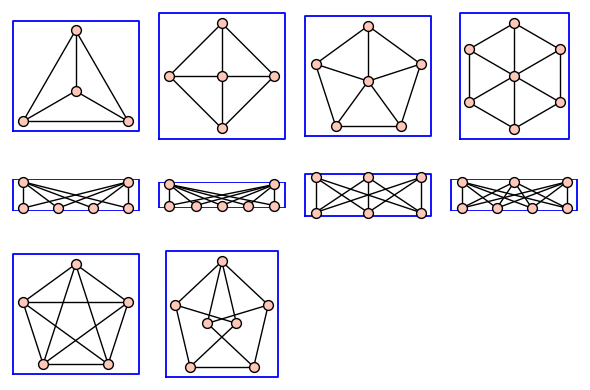

WheelGraph(4) 
 WheelGraph(5) 
 WheelGraph(6) 
 WheelGraph(7) 
 CompleteBipartiteGraph(2, 4) 
 CompleteBipartiteGraph(2, 5) 
 CompleteBipartiteGraph(3, 3) 
 CompleteBipartiteGraph(3, 4) 
 CompleteGraph(5) 
 MoserSpindle 
 


In [10]:
# glist = []
# for i in range(len(glist)):

garray = graphs_list.to_graphics_array(glist)
garray.nrows(), garray.ncols()
graphs_list.show_graphs(glist)

print(f"WheelGraph(4) \n WheelGraph(5) \n WheelGraph(6) \n WheelGraph(7) \n CompleteBipartiteGraph(2, 4) \n CompleteBipartiteGraph(2, 5) \n CompleteBipartiteGraph(3, 3) \n CompleteBipartiteGraph(3, 4) \n CompleteGraph(5) \n MoserSpindle \n ")